In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt

#### Load data

In [6]:
x_train = np.loadtxt("./TrainDigitX.csv", delimiter=',')

In [8]:
x_train.shape

(50000, 784)

In [11]:
nx, ny = 28, 28

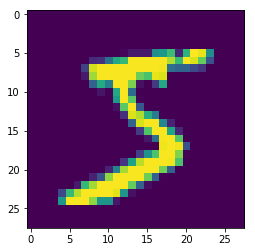

In [12]:
plt.imshow(x_train[0,:].reshape(nx,ny))

In [15]:
y_train = np.loadtxt("./TrainDigitY.csv", delimiter=',')

In [16]:
y_train.shape

(50000,)

In [17]:
y_train[0]

5.0

sigmoid

In [18]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

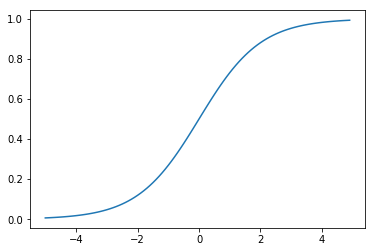

In [19]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x,y)

softmax

In [27]:
def softmax(x):
    delta = np.amax(x)
    exp = np.exp(x-delta)
    return -1*np.log(exp/np.sum(exp))

In [28]:
x = np.array([1e4, 1e4-10, 1.0e4+10])
y = softmax(x)

In [30]:
y, sum(y)

(array([1.00000454e+01, 2.00000454e+01, 4.54009603e-05]), 30.000136202880835)

In [31]:
x = np.array([0.3, 2.9,4.0])
y = softmax(x)

In [32]:
y, sum(y)

(array([4.00571446, 1.40571446, 0.30571446]), 5.717143394437356)

Forward layer

In [33]:
def forward_layer(weight,x,bias, activation='sigmoid'):
    a = np.dot(x,weight) + bias
    return sigmoid(a)

In [43]:
# example n layer NN
x = np.array([1, 0.5])

#weight
w1 = np.array([[0.1, 0.3, 0.5],[0.2,0.4,0.6]])
w2 = np.asarray([[.1,.4],[.2,.5], [.3, .6]])
w3 = np.asarray([[.1,.3],[.2,.4]])
# bias
b1 = np.array([0.1, .2, .3])
b2 = np.array([.1, .2])
b3 = np.array([.1, .2])

#layers
x1 = forward_layer(w1,x,b1)
x2 = forward_layer(w2,x1,b2)
x3 = forward_layer(w3,x2,b3)

In [41]:
x1

array([0.57444252, 0.66818777, 0.75026011])

In [44]:
x2, x3

(array([0.62624937, 0.7710107 ]), array([0.57855079, 0.66736228]))

In [45]:
### output layer
softmax(x3)

array([0.73853854, 0.64972705])

Gradient descent

In [46]:
def compute_grad(f,x, delta_h=1.0e-4):
    grads_array = np.zeros((x.shape))
    
    for i in range(np.squeeze(x).shape):
        tmp = x[i]
        tmp_upward = tmp+delta_h
        tmp_downward = tmp-delta_h
        
        grads_array[i] = 0.5*(f(tmp_upward)-f(tmp_downward))/h
        x[i] = tmp
    return grad

In [47]:
def gradient_descent(f, x, lr=0.01, steps=100):
    """
    lr: learning rate
    """
    for i in range(steps):
        grad = compute_grad(f,x)
        x -= lr*grad
    return x

Stochastic Gradient descent

Back-propagation

In [48]:
def dstate_sigmoid(x):
    return (1 - sigmoid(x))*sigmoid*(x)

In [49]:
def dstate_softmax(x,label, batch_size):
    """
    label: one-hot
    """
    return (softmax(x) - label)/batch_size